In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
wine=pd.read_csv("H:\\RStudio\\assignment\\assignments1\\PCA\\wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [64]:
wine1=wine.iloc[:,1:17].values
winedata=pd.DataFrame(wine1)

In [65]:
winedata

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [66]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [67]:
winedata.columns

RangeIndex(start=0, stop=13, step=1)

In [68]:
winesc=StandardScaler()
xd=winesc.fit_transform(winedata)


In [69]:
pca=PCA(n_components=6)
winep=pca.fit_transform(xd)


wine_data=pd.DataFrame(winep)



([<matplotlib.axis.XTick at 0x224cd8de588>,
 <a list of 6 Text xticklabel objects>)

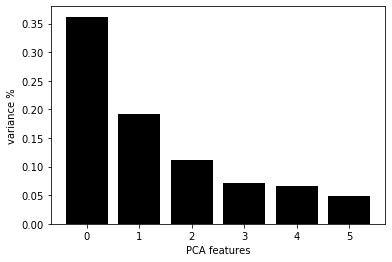

In [96]:
features=range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_,color="black")
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)



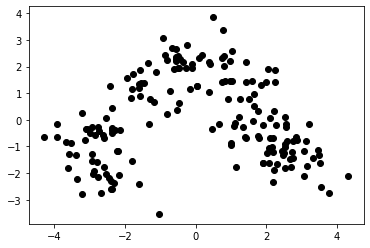

In [74]:
plt.scatter(wine_data[0],wine_data[1],alpha=1,color="black")


In [75]:
from sklearn.cluster import AgglomerativeClustering
clusterwine=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
clusterwine.fit(wine_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [76]:
clusterwine.fit_predict(wine_data)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [77]:
print(clusterwine.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


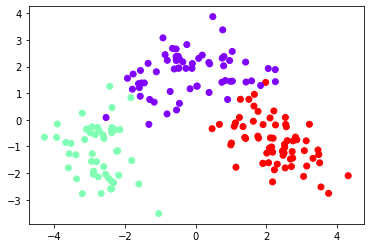

In [78]:
plt.scatter(wine_data[0],wine_data[1],c=clusterwine.labels_,cmap='rainbow')

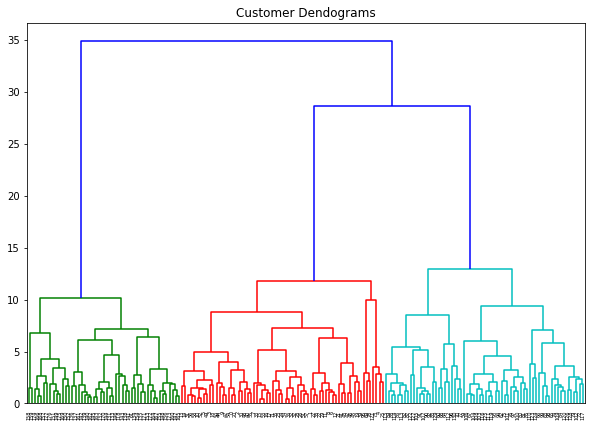

In [79]:
import scipy
from scipy import cluster
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dendrogram(linkage(wine_data,method="ward"))
plt.show()

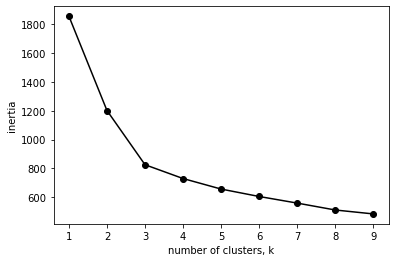

In [80]:
from sklearn.cluster import KMeans
ks=range(1,10)
inertias=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(wine_data.iloc[:,:5])
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [97]:
var1=pca.explained_variance_ratio_
var2=np.cumsum(np.round(var1,decimals=4)*100)
print(var2)

[36.2  55.41 66.53 73.6  80.16 85.1 ]


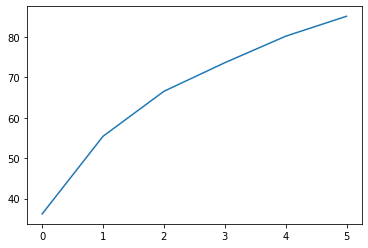

In [98]:
plt.plot(var2)